# Pymaceuticals Inc.
---

### Analysis

- During this study, I was tasked with analyzing the data provided by Pymaceuticals, Inc. A pharmaceutical company that specializes in anti-cancer medication. Recently, it began screening for potential treaments for squamos cell carcinoma (SCC). Over the course of 45 days, 248 mice who were identified with SCC tumors received treatment with a range of drug regimens. The purpose of this study is to compare the performance of Pymaceuticals drug of interest, Capomulin, against other treatment regimens. 
- Out of the 248 mice, 51% of the mice were male and 49% are female. 
- The main drug that was tested aside from the company's Capomulin, was the drug regimen Ramicane.  
- While analyzing the Quartiles, Outliers, and Boxplots, we could observe that the aeverage tumor volume of the drugs Capomulin and Ramicane, was significantly lower than the drugs Infubinol and Ceftamin. This is one indication that the pharmaceuticals drug of interest seem to be managing the cancer's tumor volume well. 
- When analyzing the data more in depth, we can draw a direct correlation between the weight of each mice treated with the Capomulin drug, and the average tumor volume. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mice_study = pd.merge(study_results, mouse_metadata, how= "left", on=["Mouse ID", "Mouse ID"],sort = False)

# Display the data table for preview
mice_study.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count = mice_study["Mouse ID"].unique()
mice_count.size

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupl_mice_ID = mice_study.loc[mice_study.duplicated(subset = ["Mouse ID", "Timepoint"]), 'Mouse ID'].unique()
dupl_mice_ID

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
all_dupl_mice = mice_study[mice_study.iloc[:, 0] == "g989"]
all_dupl_mice 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_study = mice_study.drop(all_dupl_mice.index)
clean_mice_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [28]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = clean_mice_study["Mouse ID"].unique()
clean_mice_count.size

248

## Summary Statistics

In [8]:
clean_mice_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = clean_mice_study['Tumor Volume (mm3)'].groupby(clean_mice_study['Drug Regimen']).mean()
median = clean_mice_study['Tumor Volume (mm3)'].groupby(clean_mice_study['Drug Regimen']).median()
var = clean_mice_study['Tumor Volume (mm3)'].groupby(clean_mice_study['Drug Regimen']).var()
std = clean_mice_study['Tumor Volume (mm3)'].groupby(clean_mice_study['Drug Regimen']).std()
sem = clean_mice_study['Tumor Volume (mm3)'].groupby(clean_mice_study['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFrame.

summary_stat = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})

summary_stat.head(10)


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_agg =  clean_mice_study.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [11]:
drug_rows = pd.DataFrame(clean_mice_study['Drug Regimen'].value_counts())
drug_rows.head()

,count
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182


<Axes: title={'center': 'Mice Per Drug Regimen'}, xlabel='# of Observed Mouse Timepoints', ylabel='Drug Regimen'>

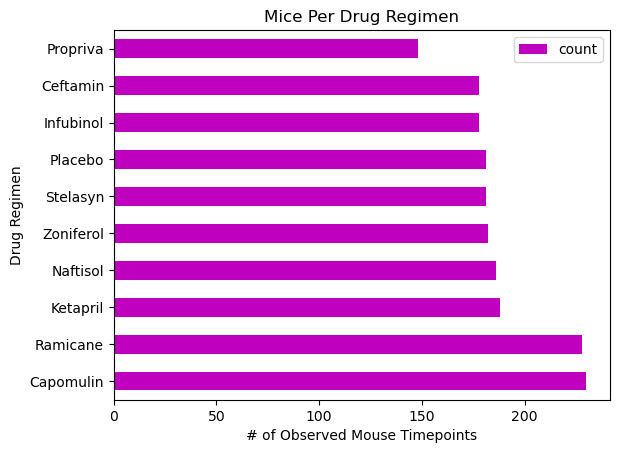

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_bar_pandas = drug_rows.plot(kind = "barh", color ='m', 
                           title = "Mice Per Drug Regimen", xlabel = "# of Observed Mouse Timepoints",
                           ylabel = "Drug Regimen")
mice_bar_pandas

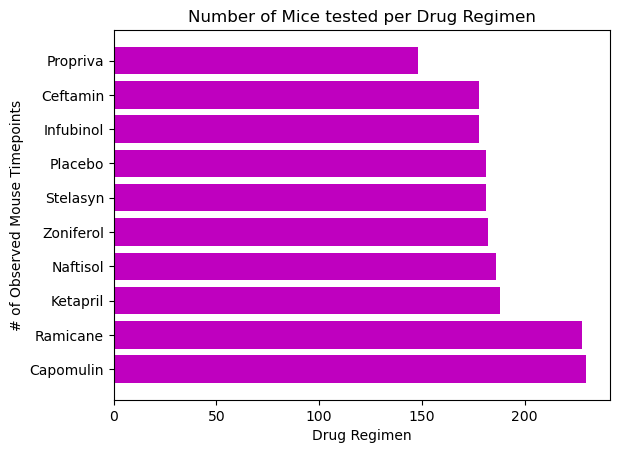

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = drug_rows.index
y_axis = drug_rows['count']

plt.barh(x_axis, y_axis, color='m', alpha=1.0, align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Number of Mice tested per Drug Regimen")
plt.yticks(rotation = "horizontal")
plt.xticks(rotation = "horizontal")
plt.show()

<Axes: ylabel='Sex'>

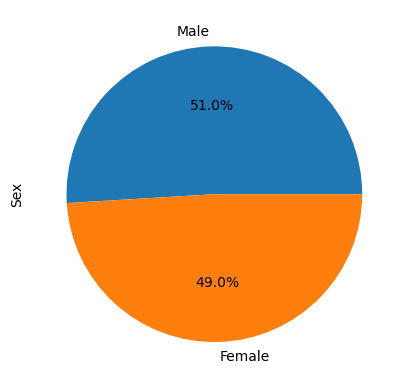

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_mice_study["Sex"].value_counts()
gender_pie = gender_data.plot(kind = "pie", ylabel = "Sex", autopct = '%.1f%%')
gender_pie

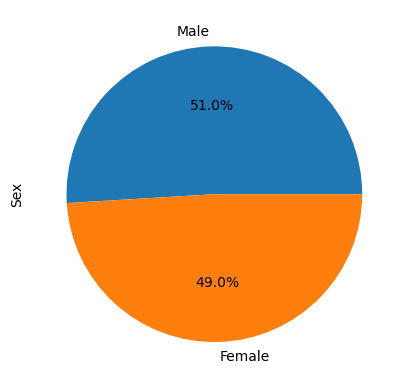

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_df = pd.DataFrame(gender_data)
gender_df
labels = ["Male", "Female"]
x_axis = gender_df['count']

plt.pie(x_axis, autopct = '%.1f%%', labels = labels)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
clean_mice_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [17]:
final_tumor_vol = clean_mice_study.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]
final_tumor_df = final_tumor_vol.reset_index()

In [31]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in regimen:

     # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']

    # add subset to tumor_vol_list 
    final_tumor_vol_list.append(final_tumor_vol)

    # Calculate the IQR and quantitatively
    quartiles = final_tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = final_tumor_vol.mean()
    iqr = upperq-lowerq    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

     # Print out the result
    print(f"{drug} Regimen")
    print(f"The upper quartile of {drug} tumors is: {upperq}")
    print(f"The lower quartile of {drug} tumors is: {lowerq}")
    print(f"Values below {round(lower_bound,2)} could be outliers.")
    print(f"Values above {round(upper_bound,2)} could be outliers.")
    print(f"Average tumor volume(mm3) for {drug} is: {round(mean,2)}")
    print('----------------------------------------------------------')



Capomulin Regimen
The upper quartile of Capomulin tumors is: 40.1592203
The lower quartile of Capomulin tumors is: 32.37735684
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.
Average tumor volume(mm3) for Capomulin is: 36.67
----------------------------------------------------------
Ramicane Regimen
The upper quartile of Ramicane tumors is: 40.65900627
The lower quartile of Ramicane tumors is: 31.56046955
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
Average tumor volume(mm3) for Ramicane is: 36.19
----------------------------------------------------------
Infubinol Regimen
The upper quartile of Infubinol tumors is: 65.52574285
The lower quartile of Infubinol tumors is: 54.04860769
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.
Average tumor volume(mm3) for Infubinol is: 58.18
----------------------------------------------------------
Ceftamin Regimen
The upper quartile of Ceftamin tumors is: 64.29983

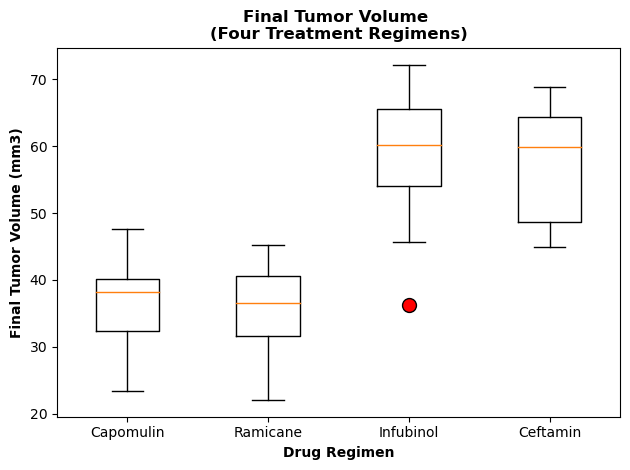

In [32]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, final_tumor_plot = plt.subplots()
final_tumor_plot.boxplot(final_tumor_vol_list, labels=regimen, flierprops={'markerfacecolor':'r','markersize': 10})

# Set x/y label, title
final_tumor_plot.set_title('Final Tumor Volume \n(Four Treatment Regimens)', fontweight='bold')
final_tumor_plot.set_xlabel('Drug Regimen', fontweight='bold')
final_tumor_plot.set_ylabel('Final Tumor Volume (mm3)', fontweight='bold')

plt.tight_layout()

plt.show()


## Line and Scatter Plots

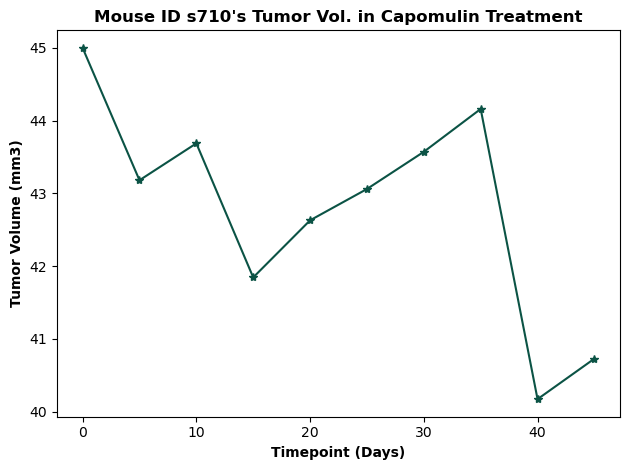

In [33]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_df = clean_mice_study.loc[clean_mice_study['Drug Regimen'] == 'Capomulin']

# Identify specific mouse ID and get data of the mouse id
mouse_id = 's710'
mouse_df = Capomulin_df.loc[Capomulin_df['Mouse ID'] == mouse_id]

# Generate a line plot
time_vol = plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], marker='*', color='#0B5345')

# Set x/y label, title
plt.title(f"Mouse ID {mouse_id}'s Tumor Vol. in Capomulin Treatment", fontweight='bold')
plt.xlabel('Timepoint (Days)', fontweight='bold')
plt.ylabel('Tumor Volume (mm3)', fontweight='bold')

plt.tight_layout()
# Present the box plot chart
plt.show()

In [34]:
#Create DF with avg weight and avg tumor volume.

#Group by Mouse ID
capo_mice = Capomulin_df.groupby("Mouse ID")
#Create variables to hold column data
capo_wg = capo_mice["Weight (g)"].mean()
capo_tumor_vol = capo_mice["Tumor Volume (mm3)"].mean()
#Create DF
new_capo_df = pd.DataFrame({"Weight (g)":capo_wg, "Tumor Volume (mm3)": capo_tumor_vol})

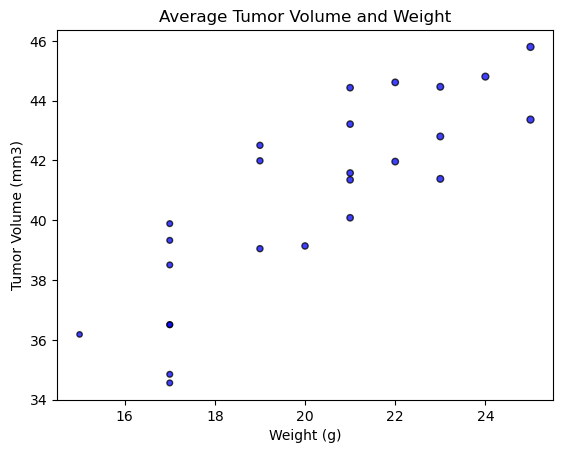

In [35]:
#Set values for scatter plot
x_values = new_capo_df["Weight (g)"]
y_values = new_capo_df["Tumor Volume (mm3)"]

#Create scatter plot
plt.scatter(x_values,y_values,marker="o",facecolors="blue", edgecolors="black", s=x_values, alpha = 0.75)
plt.title("Average Tumor Volume and Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and tumor volume is 0.84


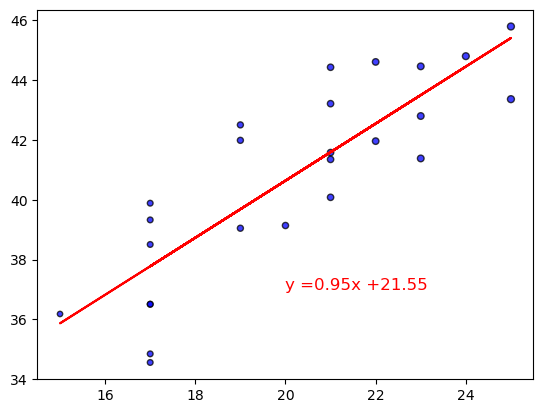

In [36]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#Set x and y values
x_values = new_capo_df["Weight (g)"]
y_values = new_capo_df["Tumor Volume (mm3)"]

#Calculate the regression line/regress values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot scatter
plt.scatter(x_values,y_values,marker="o", facecolors = "blue", edgecolors = "black", s=x_values, alpha = 0.75)

#Plot line 
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(20,37),fontsize = 12, color="red")

#Print Correlation Coefficiente
print(f"The correlation coefficient between mouse weight and tumor volume is {round(st.pearsonr(x_values,y_values)[0],2)}")